# Hello
* list

In [1]:
%%bash
GIT_REPO_DIR=/tmp/demo/sonarcube_git_repo
rm -rf $GIT_REPO_DIR
mkdir -p $GIT_REPO_DIR
# warning, this could take a while (~5 minutes)...
git clone https://github.com/SonarSource/sonarqube.git $GIT_REPO_DIR
cd $GIT_REPO_DIR

DATA_DIR="/tmp/data/input/"
rm -rf $DATA_DIR
mkdir -p $DATA_DIR
GIT_LOG_FILE="$DATA_DIR/git.log"
echo 'sha,timestamp,author,email' > $GIT_LOG_FILE
git log --pretty=format:'%h,%ad,%aN,%ae' >> $GIT_LOG_FILE
head $GIT_LOG_FILE

sha,timestamp,author,email
ee29613,Tue May 16 17:02:30 2017 +0200,Simon Brandhof,simon.brandhof@sonarsource.com
266a243,Tue May 16 13:33:25 2017 +0200,Eric Hartmann,hartmann.eric@gmail.com
1271c3a,Tue May 16 10:39:14 2017 +0200,Simon Brandhof,simon.brandhof@sonarsource.com
63e0d80,Mon May 15 10:55:48 2017 +0200,Sébastien Lesaint,sebastien.lesaint@sonarsource.com
60fd87b,Fri May 12 11:05:04 2017 +0200,Stas Vilchik,vilchiks@gmail.com
88f6526,Fri May 12 10:51:51 2017 +0200,Stas Vilchik,vilchiks@gmail.com
7a223b1,Mon May 15 08:37:28 2017 +0200,Grégoire Aubert,gregoire.aubert@sonarsource.com
9fc2898,Fri May 12 16:16:19 2017 +0200,Grégoire Aubert,gregoire.aubert@sonarsource.com
44bb869,Fri May 12 12:37:11 2017 +0200,Teryk Bellahsene,teryk.bellahsene@sonarsource.com


Cloning into '/tmp/demo/sonarcube_git_repo'...


In [2]:
import pandas as pd
commits = pd.read_csv("/tmp/data/input/git.log")
commits.head()

,sha,timestamp,author,email
0,ee29613,Tue May 16 17:02:30 2017 +0200,Simon Brandhof,simon.brandhof@sonarsource.com
1,266a243,Tue May 16 13:33:25 2017 +0200,Eric Hartmann,hartmann.eric@gmail.com
2,1271c3a,Tue May 16 10:39:14 2017 +0200,Simon Brandhof,simon.brandhof@sonarsource.com
3,63e0d80,Mon May 15 10:55:48 2017 +0200,Sébastien Lesaint,sebastien.lesaint@sonarsource.com
4,60fd87b,Fri May 12 11:05:04 2017 +0200,Stas Vilchik,vilchiks@gmail.com


In [3]:
commits['author'].value_counts().head(10)

Simon Brandhof              5013
Julien Lancelot             4189
Stas Vilchik                3365
Julien HENRY                1429
Sébastien Lesaint           1318
Jean-Baptiste Lievremont    1147
simonbrandhof               1051
Teryk Bellahsene            1020
Stephane Gamard              849
Fabrice Bellingard           813
Name: author, dtype: int64

In [4]:
personmapping = pd.read_excel("PersonMapping.xlsx", index_col=0)
personmapping

,Person
Author,
Julien HENRY,Julien Lancelot
simonbrandhof,Simon Brandhof


In [5]:
commits['person'] = commits['author']
commits.head()

,sha,timestamp,author,email,person
0,ee29613,Tue May 16 17:02:30 2017 +0200,Simon Brandhof,simon.brandhof@sonarsource.com,Simon Brandhof
1,266a243,Tue May 16 13:33:25 2017 +0200,Eric Hartmann,hartmann.eric@gmail.com,Eric Hartmann
2,1271c3a,Tue May 16 10:39:14 2017 +0200,Simon Brandhof,simon.brandhof@sonarsource.com,Simon Brandhof
3,63e0d80,Mon May 15 10:55:48 2017 +0200,Sébastien Lesaint,sebastien.lesaint@sonarsource.com,Sébastien Lesaint
4,60fd87b,Fri May 12 11:05:04 2017 +0200,Stas Vilchik,vilchiks@gmail.com,Stas Vilchik


In [6]:
commits.ix[commits['person'].isin(personmapping.index), 'person'] = \
    commits['author'].map(personmapping['Person'])
commits['person'].value_counts().head(10)

Simon Brandhof              6064
Julien Lancelot             5618
Stas Vilchik                3365
Sébastien Lesaint           1318
Jean-Baptiste Lievremont    1147
Teryk Bellahsene            1020
Stephane Gamard              849
Fabrice Bellingard           813
David Gageot                 630
Evgeny Mandrikov             588
Name: person, dtype: int64

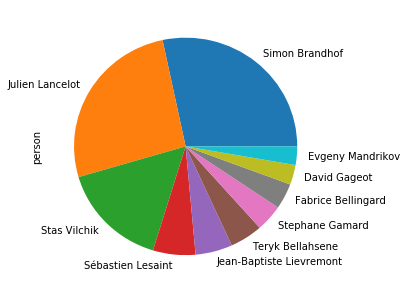

In [7]:
%matplotlib inline
commits['person'].value_counts().head(10).plot(kind='pie', figsize=(5,5))

In [8]:
commits['timestamp'] = pd.to_datetime(commits['timestamp'])
commits.head()

,sha,timestamp,author,email,person
0,ee29613,2017-05-16 15:02:30,Simon Brandhof,simon.brandhof@sonarsource.com,Simon Brandhof
1,266a243,2017-05-16 11:33:25,Eric Hartmann,hartmann.eric@gmail.com,Eric Hartmann
2,1271c3a,2017-05-16 08:39:14,Simon Brandhof,simon.brandhof@sonarsource.com,Simon Brandhof
3,63e0d80,2017-05-15 08:55:48,Sébastien Lesaint,sebastien.lesaint@sonarsource.com,Sébastien Lesaint
4,60fd87b,2017-05-12 09:05:04,Stas Vilchik,vilchiks@gmail.com,Stas Vilchik


In [9]:
commits = commits.set_index(commits['timestamp'])
commits.head()

,sha,timestamp,author,email,person
timestamp,,,,,
2017-05-16 15:02:30,ee29613,2017-05-16 15:02:30,Simon Brandhof,simon.brandhof@sonarsource.com,Simon Brandhof
2017-05-16 11:33:25,266a243,2017-05-16 11:33:25,Eric Hartmann,hartmann.eric@gmail.com,Eric Hartmann
2017-05-16 08:39:14,1271c3a,2017-05-16 08:39:14,Simon Brandhof,simon.brandhof@sonarsource.com,Simon Brandhof
2017-05-15 08:55:48,63e0d80,2017-05-15 08:55:48,Sébastien Lesaint,sebastien.lesaint@sonarsource.com,Sébastien Lesaint
2017-05-12 09:05:04,60fd87b,2017-05-12 09:05:04,Stas Vilchik,vilchiks@gmail.com,Stas Vilchik


In [10]:
commits_per_months = commits.resample('1M').count()
commits_per_months.head()

,sha,timestamp,author,email,person
timestamp,,,,,
2010-09-30,180,180,180,180,180
2010-10-31,172,172,172,172,172
2010-11-30,257,257,257,257,257
2010-12-31,258,258,258,258,258
2011-01-31,142,142,142,142,142


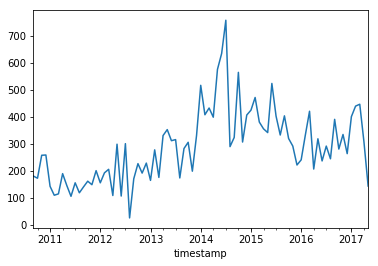

In [11]:
commits_per_months['sha'].plot()